<a href="https://colab.research.google.com/github/Sehaj1904/Data-Science/blob/main/Grocery_Store_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
# loading the data from csv file to a pandas dataframe 

vendor_data = pd.read_csv('/content/drive/MyDrive/3.Vendor_Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# printing the first 5 columns of the dataframe
vendor_data.head()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
0,Product 1,95,92,2.8,0.6,0.00323,0.08906
1,Product 2,37,27,10.0,0.8,0.00106,0.01991
2,Product 3,34,26,8.5,0.6,0.00328,0.03778
3,Product 4,32,30,2.8,0.7,0.00000,0.08562
4,Product 5,62,45,16.0,1.0,0.00079,0.02637


In [ ]:
# last 5 rows of the dataframe
vendor_data.tail()

,Products,Avg_Price_per_unit,Cost_per_unit,Average_Profit_per_unit,Average_units_sold,Incremental_acquisition,Increase_sale_volume
245,Product 246,23,21,2.0,1.5,0.00290,0.07129
246,Product 247,59,57,1.5,0.5,0.00000,0.05905
247,Product 248,16,15,0.9,1.6,0.00095,0.04835
248,Product 249,84,71,13.2,0.8,0.00264,0.00473
249,Product 250,38,28,9.7,2.1,0.00540,0.02149


In [ ]:
# number of rows & columns in the dataframe
vendor_data.shape

(250, 7)

In [ ]:
# checking for missing values
vendor_data.isnull().sum()

Products                   0
Avg_Price_per_unit         0
Cost_per_unit              0
Average_Profit_per_unit    0
Average_units_sold         0
Incremental_acquisition    0
Increase_sale_volume       0
dtype: int64

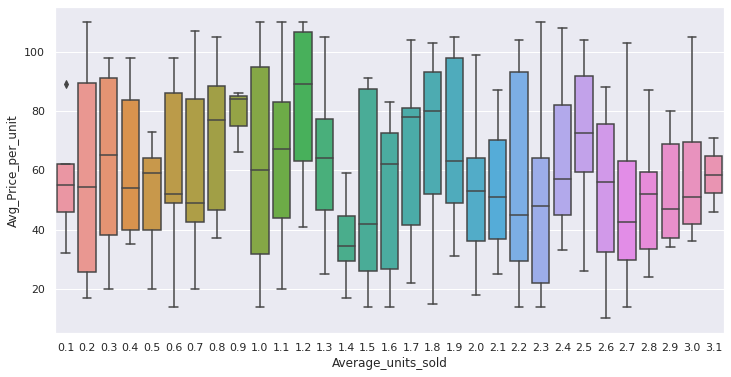

In [ ]:
# For Outliers 

sns.set(rc={"figure.figsize":(12, 6)})
sns.boxplot(x = 'Average_units_sold', y = 'Avg_Price_per_unit', data = vendor_data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


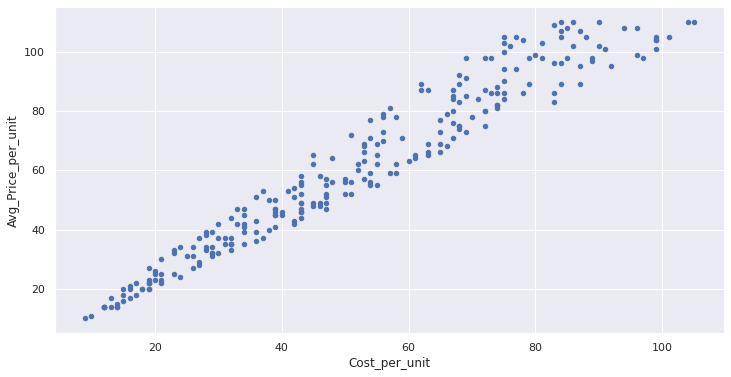

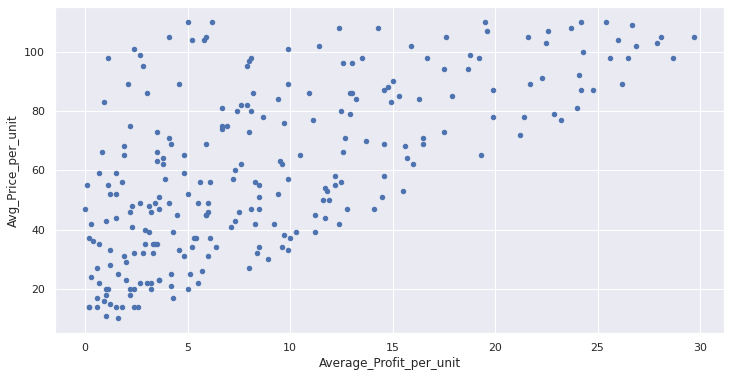

In [ ]:
vendor_data.plot(kind = "scatter", x = "Cost_per_unit", y = "Avg_Price_per_unit")
vendor_data.plot(kind = "scatter", x = "Average_Profit_per_unit", y = "Avg_Price_per_unit")

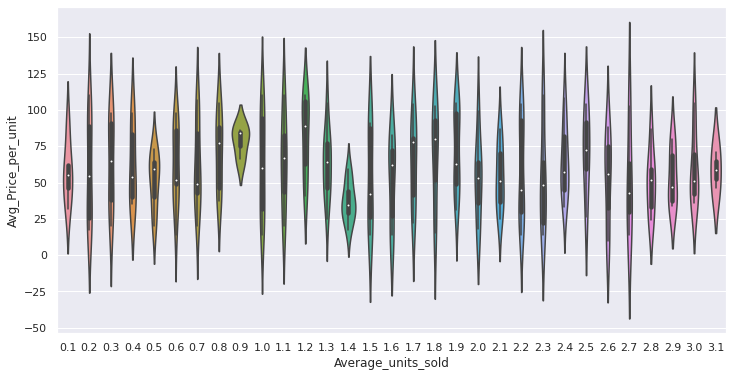

In [ ]:
sns.violinplot(x = "Average_units_sold", y = "Avg_Price_per_unit", data = vendor_data)

In [ ]:
X = vendor_data.drop('Avg_Price_per_unit', axis=1)     
y = vendor_data['Avg_Price_per_unit']                  

In [ ]:
print(X)

        Products  Cost_per_unit  ...  Incremental_acquisition  Increase_sale_volume
0      Product 1             92  ...                  0.00323               0.08906
1      Product 2             27  ...                  0.00106               0.01991
2      Product 3             26  ...                  0.00328               0.03778
3      Product 4             30  ...                  0.00000               0.08562
4      Product 5             45  ...                  0.00079               0.02637
..           ...            ...  ...                      ...                   ...
245  Product 246             21  ...                  0.00290               0.07129
246  Product 247             57  ...                  0.00000               0.05905
247  Product 248             15  ...                  0.00095               0.04835
248  Product 249             71  ...                  0.00264               0.00473
249  Product 250             28  ...                  0.00540               

In [ ]:
print(y)

0      95
1      37
2      34
3      32
4      62
       ..
245    23
246    59
247    16
248    84
249    38
Name: Avg_Price_per_unit, Length: 250, dtype: int64


## **Linear Regression**

In [ ]:
feature_col = ['Cost_per_unit']
x = vendor_data[feature_col]
Y = vendor_data['Avg_Price_per_unit']

from sklearn.linear_model import LinearRegression 
from sklearn import model_selection
lir = LinearRegression()

In [ ]:
lir.fit(x,Y)

LinearRegression()

In [ ]:
lir.score(x,Y)

0.9448423948090653

In [ ]:
lir.coef_

array([1.13831053])

In [ ]:
lir.intercept_

1.8877296751938886

In [ ]:
X_new =pd.DataFrame({'Cost_per_unit':[vendor_data.Cost_per_unit.min(),vendor_data.Cost_per_unit.max()]})

X_new

,Cost_per_unit
0,9
1,105


In [ ]:
preds = lir.predict(X_new)

In [ ]:
preds

array([ 12.13252448, 121.41033577])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


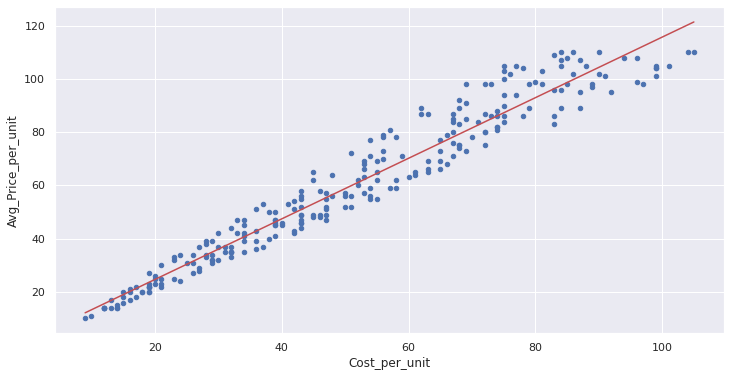

In [ ]:
vendor_data.plot(kind = "scatter", x = "Cost_per_unit", y = "Avg_Price_per_unit")
plt.plot(X_new, preds, c = 'r')

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.33, random_state = 2)

In [ ]:
lir.fit(x_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

Y_pred = lir.predict(x_test)
print('Accuracy of LR : ', np.sqrt(mean_squared_error(Y_pred, Y_test)))

Accuracy of LR :  6.2599663754259645


## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge 
rr = Ridge(alpha = 0.01)
rr.fit(x_train, Y_train)

Ridge(alpha=0.01)

In [ ]:
Y_pred = rr.predict(x_test)
print('Accuracy of LR : ', np.sqrt(mean_squared_error(Y_pred, Y_test)))

Accuracy of LR :  6.259966594974203


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
dt = classifier.fit(x_train, Y_train) 

In [ ]:
# Training
classifier.score(x_train, Y_train)

0.5209580838323353

In [ ]:
# Testing
classifier.score(x_test, Y_test)

0.04819277108433735

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(dt, x_train, Y_train, cv = 2)

for scores in score:
  print('Accuracy:', round(scores, 1)) 

Accuracy: 0.1
Accuracy: 0.1


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


In [ ]:
Y_pred = classifier.predict(x_test)
print('Accuracy of LR : ', np.sqrt(mean_squared_error(Y_pred, Y_test)))

Accuracy of LR :  9.007359775232803


## **Support Vector Classifier (SVC)**

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
Y_pred = svc.predict(x_test)
print('Accuracy of LR : ', np.sqrt(mean_squared_error(Y_pred, Y_test)))

Accuracy of LR :  36.812615700311156
